

# Simple Linear Regression Problem

 The project is to build a Simple Linear Regression model without using any Python library or packages with hope on getting more practice on using Python. My model defines most of the functions we will like to compute when working on any Linear Regression problem like mean, variance, residual, score and RMSE. The goal is to create a model from scratch similar to sklearn.linear_model and compare mine to similar models in terms of accuracy and speed.

## My Model

 Firstly, I will to show my model below and then we can explore it usage later 

In [1]:
class SimpleOLR:
    def __init__(self, x: list, y: list):
#         # check data types
#         if not isinstance(x, list):
#             raise ValueError("x not a list!")
            
#         if not isinstance(y, list):
#             raise ValueError("y not a list!")
            
#         # check if count of x and y are same
#         if not len(x) == len(y):
#             raise ValueError("length of x and y should be equal!")
            
        self.x = x
        self.y = y
        self.fitted = False
        
    def mean(self, data):
        return sum(data)/len(data)
    
    def beta_1(self):
        top_x = [i - self.x_bar for i in x]
        top_y = [j - self.y_bar for j in y]
        numerator = sum([i * j for i, j in zip(top_x, top_y)])
        denomerator = sum([i**2 for i in top_x]) 
        self.beta_1 = numerator / denomerator
        
    def beta_0(self):
        self.beta_0 = self.y_bar - (self.beta_1 * self.x_bar)
        
    def fit(self):
        self.x_bar = self.mean(x)
        self.y_bar = self.mean(y)
        self.beta_1()
        self.beta_0()
        self.fitted = True
        
    def predict(self, x_list: list) -> list:    #y_hat
        if not self.fitted:
            raise ValueError("Model has not been fitted! Call dot fit!")
        return [self.beta_0 + self.beta_1 * x for x in x_list]
    
    def residual(self):
        y_hats =  self.predict(self.x)
        return [y - y_hat for y, y_hat in zip(self.y, y_hats)]
    
    def variance(self, z: list):
        self.z_bar = self.mean(z)
        return sum([(j - self.z_bar)**2 for j in z])/(len(z))
        
    def mse(self, y_pred: list, y_actual: list):
        return sum([(i - j)**2 for i, j in zip(y_actual, y_pred)])/len(y_actual)
    
    def rmse(self, y_pred: list, y_actual: list):
        mse = self.mse(y_pred, y_actual)
        return mse ** 0.5
    
    def mae(self, y_pred: list, y_actual: list):
        return sum([abs(i - j) for i, j in zip(y_actual, y_pred )])/len(y_actual)
    
    def score(self, y_pred: list, y_actual: list):
        top = sum([(i - self.y_bar)**2 for i in y_pred])
        bottom = sum([(i - self.y_bar)**2 for i in y_actual])
        return top/bottom

## Data Information

 For the purpose of this project, I will be looking into predicting the salary of an employee based on his/her years of experience. The data used in this project is gotten from [Kaggle](https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression). 
 Secondly, I will import the datasert and try to take a deeper look into the data before applying our model on it.

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e2ec3246bb8747ee97824fb85f3fa255 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='d68KM3qHckutNO673WgjONzp6_xt7395qalvydu2POlh',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e2ec3246bb8747ee97824fb85f3fa255.get_object(Bucket='jupytersample-donotdelete-pr-6mceat5nhvrwa4',Key='Salary_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# df_data_1 = pd.read_csv(body)
# df_data_1.head()
df = pd.read_csv(body)
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# import pandas as pd
# df = pd.read_csv('Salary_Data.csv')
# df.head()  #Looking at the first 5 entries of my dataset

Let's try to get an overview decription of our dataset and some statistical information.

In [4]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

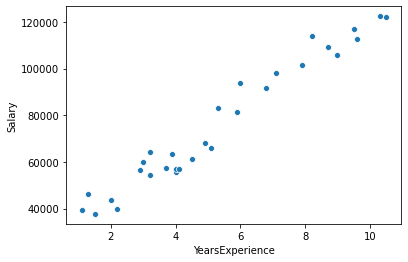

In [5]:
sns.scatterplot(x='YearsExperience', y='Salary', data=df)

What will a good regression line look like from the above scatter plot? 

Let's answer the question below

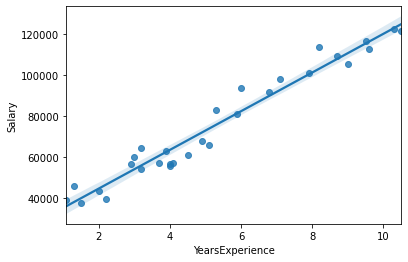

In [6]:
sns.regplot(x='YearsExperience', y='Salary', data=df)

In [7]:
df.dtypes  # What kind of data types are we working with?

YearsExperience    float64
Salary             float64
dtype: object

In [8]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


From the summary above, we can see that our dataset has 30 entries with mean (5.3133, 76,003), median (4.7, 65,237) and maximum (10.5, 122,391) in terms of (Years of Experience, Salary).

Next, I will like to split my dataset into training and test set. Since my dataset does not have so much entries. I will be using 80 percent of the data as training data.

In [9]:
from sklearn.model_selection import train_test_split
X = df['YearsExperience']
y = df['Salary']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=100)

print("Training independent set size is ", X_train.shape, "and dependent set size is ", y_train.shape, 
      "while the test set sizes are ", X_test.shape, "and ", y_test.shape, "respectively.")

Training independent set size is  (24,) and dependent set size is  (24,) while the test set sizes are  (6,) and  (6,) respectively.



Now let us start doing some interesting annalysis. Firstly, I will like to convert the training and test set into one dimensional array in order to be able to easily easily fit the data and use it in general.

Time for the best part. Using my model to analyze the data. 

In [10]:
x = X_train.values
y = y_train.values
olr = SimpleOLR(x, y)

In [11]:
olr.fit()

In [12]:
fancy_y = olr.predict(X_test.values)
error = abs(fancy_y - y_test)
print("The difference between the model prediction and actual values are \n", error)
list(zip(fancy_y, y_test))  # To easily have a glance at predicted values to actual values to know where the difference above where derieved from

The difference between the model prediction and actual values are 
 9     4266.195763
26    1219.329173
28     847.563939
13    8118.642319
5     2675.697349
12    7306.530680
Name: Salary, dtype: float64


[(61455.195762891126, 57189.0),
 (115749.6708267569, 116969.0),
 (123238.56393901426, 122391.0),
 (65199.64231901979, 57081.0),
 (53966.30265063377, 56642.0),
 (64263.53067998763, 56957.0)]

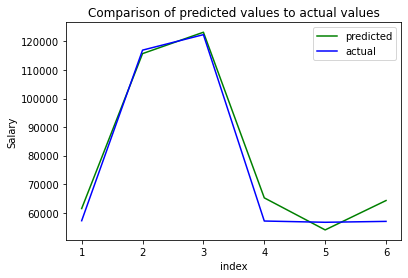

In [13]:
k = [i for i in range(1,len(y_test)+1,1)]
plt.plot(k, fancy_y ,color='g',linestyle='-', label='predicted')
plt.plot(k, y_test ,color='b',linestyle='-', label='actual')
plt.xlabel('index')
plt.ylabel('Salary')
plt.title('Comparison of predicted values to actual values')
plt.legend()

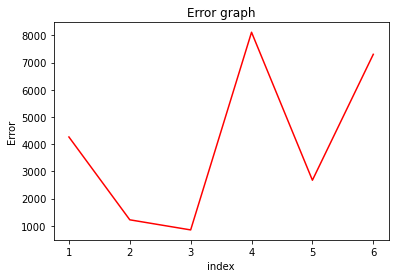

In [14]:
k = [i for i in range(1,len(y_test)+1,1)]
plt.plot(k,error ,color='r',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error graph')
plt.show()

In [15]:
print("The value of my Mean square error is", olr.mse(fancy_y, y_test).tolist())
print("The value of my r-square is", olr.score(fancy_y, y_test).tolist())

The value of my Mean square error is 24477109.0896557
The value of my r-square is 0.9052549685422319


Hence, from the value of the R-square, we can say that 90.5 percentage of the dependent variable(Salary) were explained by an independent variable(YearsExperience).

In [16]:
# Intecept and coeff of the line
print('Intercept of the model:', olr.beta_0)
print('Coefficient of the line:', olr.beta_1)

Intercept of the model: 26819.065118700877
Coefficient of the line: 9361.116390321688


The regression line is of the form:

## Salary = 26819.1 + (9361.1 * Years of Expereince)

# Using other models out there to compare what I did

### 1) Sklearn

It is time to start trying some models on my data. I will firstly try the popular sklearn linear regression model 

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()




Since we were able to fit our model, it is time to start using it. Let us get our predicted values

In [18]:
y_sk = lr.predict(X_test)
abs(y_sk - y_test)
print("The difference between the model prediction and actual values are \n", abs(y_sk - y_test))
list(zip(y_sk, y_test))  # To easily have a glance at predicted values to actual values to know where the difference above where derieved from

The difference between the model prediction and actual values are 
 [[4266.19576289]
 [1219.32917324]
 [ 847.56393901]
 [8118.64231902]
 [2675.69734937]
 [7306.53067999]]


[(array([61455.19576289]), array([57189.])),
 (array([115749.67082676]), array([116969.])),
 (array([123238.56393901]), array([122391.])),
 (array([65199.64231902]), array([57081.])),
 (array([53966.30265063]), array([56642.])),
 (array([64263.53067999]), array([56957.]))]

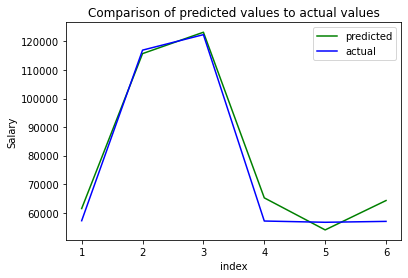

In [19]:
k = [i for i in range(1,len(y_test)+1,1)]
plt.plot(k, y_sk ,color='green',linestyle='-', label='predicted')
plt.plot(k, y_test ,color='blue',linestyle='-', label='actual')
plt.xlabel('index')
plt.ylabel('Salary')
plt.title('Comparison of predicted values to actual values')
plt.legend()

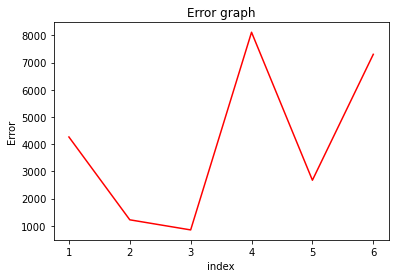

In [20]:
k = [i for i in range(1,len(y_test)+1,1)]
plt.plot(k, abs(y_sk - y_test) ,color='r',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error graph')
plt.show()

We can also do same to the training set because why not 

In [21]:
mse(y_sk, y_test)
print('The test Mean square error is ', mse(y_sk, y_test))

r2_score(y_sk, y_test)
print('The r-square value is', r2_score(y_sk, y_test))

The test Mean square error is  24477109.08965574
The r-square value is 0.9683039091236145


This value is approximately 6 percentage better than my model in terms of the accuracy as provided by the R-square

In [22]:
# Intecept and coeff of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: [26819.0651187]
Coefficient of the line: [[9361.11639032]]


The regression line is of the form:

## Salary = 26819.1 + (9361.1 * Years of Expereince)

# Comparison to Sklearn.linear_model

|                      | Mine                                              | Sklearn.linear_model                             |
| -------------------- |:-------------------------------------------------:| ------------------------------------------------:|
| Model                | Salary = 26819.1 + (9361.1 * Years of Expereince) | Salary = 26819.1 + (9361.1 * Years of Expereince)|
| R-square             | 0.9053                                            |   0.9683                                         |
|Mean Square Error(MSE)|   24,477,109.1                                    |   24,477,109.1                                   |


## Using Gradient Descent

In [23]:
def update_w_and_b(years, salary, w, b, alpha):
    dl_dw = 0.0
    dl_db = 0.0
    N = len(years)
    
    for i in range(N):
        dl_dw += -2 * years[i] * (salary[i] - (w * years[i] + b) )
        dl_db += -2 * (salary[i] - (w * years[i] + b) )
        
    # update w and b
    w = w -  (1/float(N)) * dl_dw * alpha
    b = b -  (1/float(N)) * dl_db * alpha
    
    return w, b

def avg_loss(years, salary, w, b):
    N = len(years)
    total_error = 0.0
    for k in range(N):
        total_error += (salary[k] - (w * years[k] + b)) ** 2
    return total_error/float(N)
    

def train(years, salary, w, b, alpha, epochs):
    for j in range(epochs):
        w, b = update_w_and_b(years, salary, w, b, alpha)
        
        # log the progress
        if j % 400 == 0:
            print("epoch:", j, "loss:", avg_loss(years, salary, w, b))
            
    return w, b
    

In [24]:
train(X_train, y_train, 0.0, 0.0, 0.001, 15000)

epoch: 0 loss: [5.54433535e+09]
epoch: 400 loss: [1.28391608e+08]
epoch: 800 loss: [1.01142415e+08]
epoch: 1200 loss: [81712447.037701]
epoch: 1600 loss: [67857957.46598704]
epoch: 2000 loss: [57979048.69140799]
epoch: 2400 loss: [50934917.75671759]
epoch: 2800 loss: [45912117.99640948]
epoch: 3200 loss: [42330623.32147258]
epoch: 3600 loss: [39776847.59504102]
epoch: 4000 loss: [37955884.26748119]
epoch: 4400 loss: [36657450.96889574]
epoch: 4800 loss: [35731606.38687745]
epoch: 5200 loss: [35071435.24756166]
epoch: 5600 loss: [34600701.88512682]
epoch: 6000 loss: [34265046.65072986]
epoch: 6400 loss: [34025708.53414649]
epoch: 6800 loss: [33855049.0949973]
epoch: 7200 loss: [33733360.81322062]
epoch: 7600 loss: [33646591.29144321]
epoch: 8000 loss: [33584720.50323293]
epoch: 8400 loss: [33540603.69406605]
epoch: 8800 loss: [33509146.31478623]
epoch: 9200 loss: [33486715.70999318]
epoch: 9600 loss: [33470721.62393448]
epoch: 10000 loss: [33459317.08129228]
epoch: 10400 loss: [33451185

(array([9367.74606622]), array([26775.31785865]))

The regression line is of the form:

## Salary = 26775.3 + (9367.75 * Years of Expereince)

## Summary

|                             | Model                                             | 
| --------------------------- |:-------------------------------------------------:| 
| Mine                        | Salary = 26819.1 + (9361.1 * Years of Expereince) | 
| Sklearn.linear_model        | Salary = 26819.1 + (9361.1 * Years of Expereince) | 
|Gradient Descent             | Salary = 26775.3 + (9367.75 * Years of Expereince)|


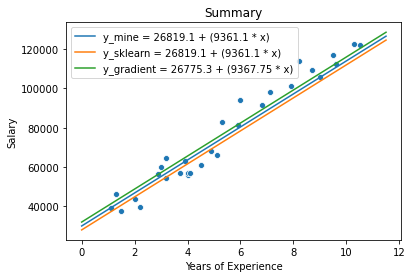

In [27]:
sns.scatterplot(x='YearsExperience', y='Salary', data=df)

# Create the vectors X and Y
x = np.array(range(24))/2
y = np.array(range(30000, 130000, 4200))

# Create the plot
plt.plot(x, y, label='y_mine = 26819.1 + (9361.1 * x)')
plt.plot(x, y - 2000, label='y_sklearn = 26819.1 + (9361.1 * x)')
plt.plot(x, y + 2000, label='y_gradient = 26775.3 + (9367.75 * x)')

# Add a title
plt.title('Summary')

# Add X and y Label
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.legend()
plt.show()